In [82]:
# Preprocessing the kaggle Indian Food 101 dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\new\Documents\PythonFiles\Food Recommendation\datasets\indian_food.csv")

#Reassigning the values with -1 into relevant values
data.loc[data.flavor_profile == "-1", "flavor_profile"] = "Neutral"
data.loc[data.region == "-1", "region"] = "Neutral"
data.loc[data.state == "-1", "state"] = "Neutral"
data.loc[data.prep_time == -1, "prep_time"] = 0
data.loc[data.cook_time == -1, "cook_time"] = 0

data.at[110, 'region'] = "North"

#encode
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["diet"] = label_encoder.fit_transform(data["diet"])
data["flavor_profile"] = label_encoder.fit_transform(data["flavor_profile"])
data["course"] = label_encoder.fit_transform(data["course"])
data["region"] = label_encoder.fit_transform(data["region"])


In [85]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1
1,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1
5,Imarti,"Sugar syrup, lentil flour",1,0,50,4,0,West Bengal,1
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",1,0,50,4,0,Uttar Pradesh,3
7,Kaju katli,"Cashews, ghee, cardamom, sugar",1,0,20,4,0,Neutral,2
8,Kalakand,"Milk, cottage cheese, sugar",1,1,30,4,0,West Bengal,1
9,Kheer,"Milk, rice, sugar, dried fruits",1,0,40,4,0,Neutral,2


In [84]:
data.loc[data.prep_time <=10, "prep_time"] = 0
data.loc[data.prep_time >= 30, "prep_time"] = 2
data.loc[data.prep_time >10, "prep_time"] = 1


*****

# Clustering

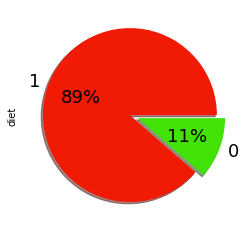

In [86]:
# Pie chart
import matplotlib.pyplot as plt
data['diet'].value_counts().plot(kind='pie', autopct='%2.0f%%', explode=[0,0.10] ,fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show() # 1 is veg # 0 is non-veg

In [87]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1
1,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1


In [88]:
data["ingredients"]

0                        Maida flour, yogurt, oil, sugar
1                                Gram flour, ghee, sugar
2           Carrots, milk, sugar, ghee, cashews, raisins
3      Flour, ghee, kewra, milk, clarified butter, su...
4      Milk powder, plain flour, baking powder, ghee,...
5                              Sugar syrup, lentil flour
6      Maida, corn flour, baking soda, vinegar, curd,...
7                         Cashews, ghee, cardamom, sugar
8                            Milk, cottage cheese, sugar
9                        Milk, rice, sugar, dried fruits
10                               Gram flour, ghee, sugar
11                             Yogurt, milk, nuts, sugar
12     Refined flour, besan, ghee, powdered sugar, yo...
13     Firm white pumpkin, sugar, kitchen lime, alum ...
14                                     Rice, sugar, nuts
15                   Condensed milk, sugar, spices, nuts
16                            Semolina, ghee, nuts, milk
17                             

In [89]:
# Cleaning the dataset

In [90]:
lst=[]
for i in data["ingredients"]:
    lst.append(list(i.split(",")))
    #data["ingredients"]=data["ingredients"].apply(list(i.split(",")))
print(lst)
data['list of ingred'] = lst

[['Maida flour', ' yogurt', ' oil', ' sugar'], ['Gram flour', ' ghee', ' sugar'], ['Carrots', ' milk', ' sugar', ' ghee', ' cashews', ' raisins'], ['Flour', ' ghee', ' kewra', ' milk', ' clarified butter', ' sugar', ' almonds', ' pistachio', ' saffron', ' green cardamom'], ['Milk powder', ' plain flour', ' baking powder', ' ghee', ' milk', ' sugar', ' water', ' rose water'], ['Sugar syrup', ' lentil flour'], ['Maida', ' corn flour', ' baking soda', ' vinegar', ' curd', ' water', ' turmeric', ' saffron', ' cardamom'], ['Cashews', ' ghee', ' cardamom', ' sugar'], ['Milk', ' cottage cheese', ' sugar'], ['Milk', ' rice', ' sugar', ' dried fruits'], ['Gram flour', ' ghee', ' sugar'], ['Yogurt', ' milk', ' nuts', ' sugar'], ['Refined flour', ' besan', ' ghee', ' powdered sugar', ' yoghurt', ' green cardamom'], ['Firm white pumpkin', ' sugar', ' kitchen lime', ' alum powder'], ['Rice', ' sugar', ' nuts'], ['Condensed milk', ' sugar', ' spices', ' nuts'], ['Semolina', ' ghee', ' nuts', ' milk'

In [91]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,list of ingred
0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1,"[Maida flour, yogurt, oil, sugar]"
1,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6,"[Gram flour, ghee, sugar]"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3,"[Carrots, milk, sugar, ghee, cashews, rai..."
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6,"[Flour, ghee, kewra, milk, clarified butte..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1,"[Milk powder, plain flour, baking powder, g..."
5,Imarti,"Sugar syrup, lentil flour",1,0,50,4,0,West Bengal,1,"[Sugar syrup, lentil flour]"
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",1,0,50,4,0,Uttar Pradesh,3,"[Maida, corn flour, baking soda, vinegar, ..."
7,Kaju katli,"Cashews, ghee, cardamom, sugar",1,0,20,4,0,Neutral,2,"[Cashews, ghee, cardamom, sugar]"
8,Kalakand,"Milk, cottage cheese, sugar",1,1,30,4,0,West Bengal,1,"[Milk, cottage cheese, sugar]"
9,Kheer,"Milk, rice, sugar, dried fruits",1,0,40,4,0,Neutral,2,"[Milk, rice, sugar, dried fruits]"


In [92]:
data.sample()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,list of ingred
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",1,0,90,3,1,Rajasthan,6,"[Moong dal, masoor dal, chana dal, wheat fl..."


In [94]:
# words count
import re
from collections import Counter
words_collection = Counter([item for subtext in data['list of ingred'] for item in subtext])
most_common = pd.DataFrame(words_collection.most_common(30))
most_common.columns = ['most_common_word','count']
most_common

,most_common_word,count
0,sugar,44
1,ginger,29
2,garam masala,27
3,ghee,25
4,curry leaves,25
5,jaggery,18
6,urad dal,17
7,Rice flour,16
8,milk,15
9,tomato,15


In [95]:
cmn= most_common["most_common_word"].unique()

In [96]:
cmn

array([' sugar', ' ginger', ' garam masala', ' ghee', ' curry leaves',
       ' jaggery', ' urad dal', 'Rice flour', ' milk', ' tomato',
       ' garam masala powder', ' mustard oil', 'Chana dal',
       ' sesame seeds', ' saffron', ' turmeric', ' coconut',
       'Whole wheat flour', ' clarified butter', ' cardamom',
       ' gram flour', ' mustard seeds', ' lemon juice', ' garlic',
       ' potato', 'Urad dal', ' baking soda', 'Rice', ' salt',
       'Wheat flour'], dtype=object)

In [97]:
ingred=data.reindex(columns=cmn)

In [98]:
concat = pd.concat([ingred, data], axis=1)

In [99]:
# adding values from incredients (manual one hot encoding)
for enum, i in enumerate(concat["list of ingred"]):
    for ingred in i:
        if ingred in cmn:
            concat[ingred][enum]=1
    

C:\Users\new\AppData\Local\Temp/ipykernel_12080/3407752801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat[ingred][enum]=1


In [100]:
concat=concat.fillna(0)

In [101]:
concat.head()

,sugar,ginger,garam masala,ghee,curry leaves,jaggery,urad dal,Rice flour,milk,tomato,garam masala powder,mustard oil,Chana dal,sesame seeds,saffron,turmeric,coconut,Whole wheat flour,clarified butter,cardamom,gram flour,mustard seeds,lemon juice,garlic,potato,Urad dal,baking soda,Rice,salt,Wheat flour,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,list of ingred
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1,"[Maida flour, yogurt, oil, sugar]"
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6,"[Gram flour, ghee, sugar]"
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3,"[Carrots, milk, sugar, ghee, cashews, rai..."
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6,"[Flour, ghee, kewra, milk, clarified butte..."
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1,"[Milk powder, plain flour, baking powder, g..."


***

## Kmeans clustering

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data1 =  concat.drop(['name','state',"cook_time",'ingredients', "list of ingred"], axis=1)
data1.head(4)

,sugar,ginger,garam masala,ghee,curry leaves,jaggery,urad dal,Rice flour,milk,tomato,garam masala powder,mustard oil,Chana dal,sesame seeds,saffron,turmeric,coconut,Whole wheat flour,clarified butter,cardamom,gram flour,mustard seeds,lemon juice,garlic,potato,Urad dal,baking soda,Rice,salt,Wheat flour,diet,prep_time,flavor_profile,course,region
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,4,0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,4,0,6
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,0,3
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,0,6


In [102]:
# Defining no. of Clusters

In [46]:
## screw plot or elbow curve ############
k = list(range(2,75))
k

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [47]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 

In [49]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data1)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(data1.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,data1.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1fc2ecf0490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

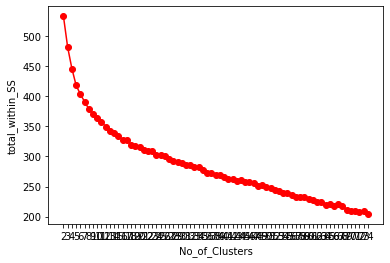

In [50]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [52]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=15) 
model.fit(data1)

KMeans(n_clusters=15)

In [53]:
model.labels_

array([ 3,  8,  1,  8,  3, 12,  1, 12,  3, 12, 12,  1, 12,  1,  3,  1, 11,
        1,  1, 11, 12, 12, 12,  3,  3,  3,  1,  1,  3,  3,  3,  1,  3,  3,
       12,  3, 12,  8, 11, 11,  8,  8, 11, 11, 11, 11,  8, 11,  8, 11, 11,
       11, 11, 11,  8, 11, 11, 11, 11, 11, 11, 11, 11,  8, 14, 14,  8, 14,
        0,  0,  0,  7,  0,  9,  0,  2, 14,  0,  4, 10,  0,  9,  0, 13, 10,
        0,  0,  0,  2, 10,  9,  0,  0,  7,  9,  0,  3,  0,  0,  9,  0,  9,
        0,  0,  6,  9,  0,  0,  9,  9,  1,  0,  9, 13,  9,  9,  7,  9,  0,
        0, 11,  0,  9,  9,  2,  2,  2,  5,  2,  2,  2,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  2,  4,  4,  5,  5,  8,  4,  2,  5,
        4,  5,  6,  2,  6,  6,  4,  6,  5,  2,  5,  0, 13, 13, 13,  2, 13,
        8,  4, 13, 13,  2, 13,  4,  2,  2,  6,  4, 13,  8, 13, 11, 13,  2,
       11, 13,  4, 13,  2,  2, 13, 10, 13,  4, 11,  4, 13,  2, 13,  2,  2,
        2, 13, 11,  2,  2,  2,  2, 13,  2, 13, 13,  2,  4, 13,  2,  8, 12,
        1,  7, 14,  7, 14

In [54]:
model.cluster_centers_

array([[ 3.84615385e-02,  4.23076923e-01,  8.07692308e-01,
        -5.55111512e-17,  1.15384615e-01,  1.38777878e-17,
         7.69230769e-02,  3.84615385e-02, -6.93889390e-18,
         3.84615385e-02,  7.69230769e-02,  3.84615385e-02,
         3.84615385e-02,  6.93889390e-18,  1.38777878e-17,
         3.84615385e-02,  1.38777878e-17,  1.38777878e-17,
         6.93889390e-18,  6.93889390e-18,  7.69230769e-02,
         6.93889390e-18,  3.84615385e-02,  3.84615385e-02,
         1.15384615e-01,  3.84615385e-02, -1.04083409e-17,
        -1.04083409e-17,  7.69230769e-02, -1.04083409e-17,
         9.61538462e-01,  4.23076923e-01,  3.03846154e+00,
         1.07692308e+00,  2.88461538e+00],
       [ 3.12500000e-01, -2.77555756e-17, -1.38777878e-17,
         1.87500000e-01, -2.77555756e-17,  6.25000000e-02,
         0.00000000e+00,  6.25000000e-02,  1.25000000e-01,
        -6.93889390e-18, -1.38777878e-17, -1.38777878e-17,
         6.93889390e-18,  6.93889390e-18,  6.25000000e-02,
         6.25

In [60]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
concat['clust']=md # creating a  new column and assigning it to new column 

In [61]:
concat.head()

,sugar,ginger,garam masala,ghee,curry leaves,jaggery,urad dal,Rice flour,milk,tomato,garam masala powder,mustard oil,Chana dal,sesame seeds,saffron,turmeric,coconut,Whole wheat flour,clarified butter,cardamom,gram flour,mustard seeds,lemon juice,garlic,potato,Urad dal,baking soda,Rice,salt,Wheat flour,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,list of ingred,clust
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1,"[Maida flour, yogurt, oil, sugar]",3
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6,"[Gram flour, ghee, sugar]",8
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3,"[Carrots, milk, sugar, ghee, cashews, rai...",1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6,"[Flour, ghee, kewra, milk, clarified butte...",8
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1,"[Milk powder, plain flour, baking powder, g...",3


In [67]:
concat.iloc[:,1:40].groupby(concat.clust).mean()

,ginger,garam masala,ghee,curry leaves,jaggery,urad dal,Rice flour,milk,tomato,garam masala powder,mustard oil,Chana dal,sesame seeds,saffron,turmeric,coconut,Whole wheat flour,clarified butter,cardamom,gram flour,mustard seeds,lemon juice,garlic,potato,Urad dal,baking soda,Rice,salt,Wheat flour,diet,prep_time,cook_time,flavor_profile,course,region
clust,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.423077,0.807692,0.000000,0.115385,0.000000,0.076923,0.038462,0.000000,0.038462,0.076923,0.038462,0.038462,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.038462,0.038462,0.115385,0.038462,0.000000,0.000000,0.076923,0.000000,0.961538,0.423077,33.653846,3.038462,1.076923,2.884615
1,0.000000,0.000000,0.187500,0.000000,0.062500,0.000000,0.062500,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,1.000000,0.187500,33.750000,4.000000,0.000000,3.375000
2,0.133333,0.000000,0.000000,0.133333,0.033333,0.200000,0.033333,0.000000,0.033333,0.000000,0.000000,0.066667,0.033333,0.000000,0.000000,0.033333,0.133333,0.000000,0.000000,0.033333,0.000000,0.066667,0.033333,0.066667,0.066667,0.033333,0.000000,0.000000,0.000000,0.966667,1.466667,40.366667,3.000000,1.566667,5.633333
3,0.000000,0.000000,0.250000,0.000000,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.062500,0.125000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,1.000000,1.562500,39.062500,4.000000,0.000000,1.000000
4,0.142857,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.071429,0.214286,0.071429,0.000000,0.000000,0.142857,0.071429,0.000000,0.000000,0.071429,1.000000,0.285714,23.928571,0.142857,1.214286,5.571429
5,0.050000,0.050000,0.000000,0.400000,0.050000,0.350000,0.000000,0.050000,0.250000,0.000000,0.000000,0.250000,0.050000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.250000,0.050000,0.050000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.900000,0.100000,22.500000,3.000000,1.100000,4.950000
6,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,1.000000,1.833333,35.000000,0.000000,1.166667,4.833333
7,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.230769,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.769231,0.307692,20.384615,0.153846,1.000000,2.769231
8,0.000000,0.000000,0.333333,0.000000,0.266667,0.000000,0.133333,0.266667,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.200000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,1.000000,1.333333,43.333333,4.000000,0.066667,5.400000


In [68]:
concat

,sugar,ginger,garam masala,ghee,curry leaves,jaggery,urad dal,Rice flour,milk,tomato,garam masala powder,mustard oil,Chana dal,sesame seeds,saffron,turmeric,coconut,Whole wheat flour,clarified butter,cardamom,gram flour,mustard seeds,lemon juice,garlic,potato,Urad dal,baking soda,Rice,salt,Wheat flour,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,list of ingred,clust
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Balu shahi,"Maida flour, yogurt, oil, sugar",1,2,25,4,0,West Bengal,1,"[Maida flour, yogurt, oil, sugar]",3
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boondi,"Gram flour, ghee, sugar",1,2,30,4,0,Rajasthan,6,"[Gram flour, ghee, sugar]",8
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",1,1,60,4,0,Punjab,3,"[Carrots, milk, sugar, ghee, cashews, rai...",1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",1,1,30,4,0,Rajasthan,6,"[Flour, ghee, kewra, milk, clarified butte...",8
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",1,1,40,4,0,West Bengal,1,"[Milk powder, plain flour, baking powder, g...",3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Imarti,"Sugar syrup, lentil flour",1,0,50,4,0,West Bengal,1,"[Sugar syrup, lentil flour]",12
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",1,0,50,4,0,Uttar Pradesh,3,"[Maida, corn flour, baking soda, vinegar, ...",1
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kaju katli,"Cashews, ghee, cardamom, sugar",1,0,20,4,0,Neutral,2,"[Cashews, ghee, cardamom, sugar]",12
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kalakand,"Milk, cottage cheese, sugar",1,1,30,4,0,West Bengal,1,"[Milk, cottage cheese, sugar]",3
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kheer,"Milk, rice, sugar, dried fruits",1,0,40,4,0,Neutral,2,"[Milk, rice, sugar, dried fruits]",12


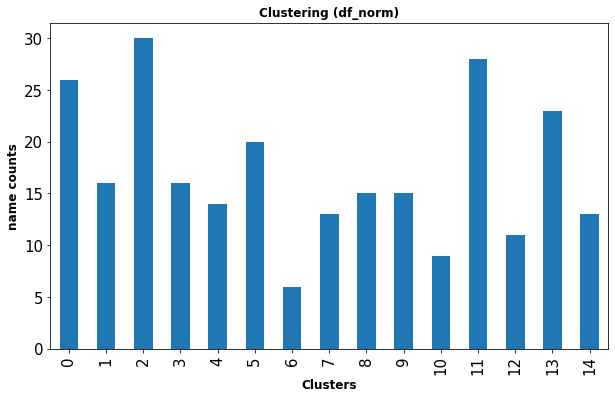

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
concat.groupby(['clust']).count()['name'].plot(kind='bar')
plt.ylabel('name count')
plt.title('Clustering (df_norm)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('name counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [70]:
import pickle
# Saving model as pickle file for later use 
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [71]:
concat.to_csv('concat.csv')

***